In [90]:
# Compare Univariate version Vs Multiple version
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("housing.csv")

In [92]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [93]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [109]:
# MULTIPLE
m = 10
feature_names = ["housing_median_age", "median_income"] # "longitude","longitude"
target_name = "median_house_value"
bias = 0
derivative_bias = 0
weights = []
derivatives = []
feature_values = []
for name in feature_names:
    feature_value = df.loc[:,name].head(m).to_numpy()
    feature_values.append(feature_value)
    weights.append(0)
    derivatives.append(0)
features = np.array(feature_values)
feature_values = 0
target = df.loc[:,target_name].head(m).to_numpy()
target = target / 10000
cost = 0
alpha = 0.00001
epochs = 90000
history_cost = []
number_of_features = features.shape[0]


for i in range(epochs):

    y_hats = 0
    for j in range(number_of_features):
        y_hats += features[j] * weights[j]
    y_hats += bias 

    costs = ( (y_hats - target) ** 2)
    cost = sum(costs) / (2 * m)
    history_cost.append(cost)

    for j in range(number_of_features):
        derivatives[j] = sum(((y_hats - target) * features[j])) / m

    derivative_bias = sum((y_hats - target)) / m

    for j in range(number_of_features):
        weights[j] = weights[j] - (alpha * derivatives[j])    
    bias = bias - (alpha * derivative_bias)
    
    print(f"cost: {cost}")

cost: 515.5143700000001
cost: 494.39006173590826
cost: 474.22770400451054
cost: 454.9834770950294
cost: 436.6155574172466
cost: 419.08402657216595
cost: 402.3507845647815
cost: 386.37946697026746
cost: 371.1353658734988
cost: 356.5853544100164
cost: 342.6978147443798
cost: 329.44256932932433
cost: 316.7908152962715
cost: 304.7150618345504
cost: 293.18907042318585
cost: 282.187797785309
cost: 271.68734144116723
cost: 261.6648877413608
cost: 252.0986622673207
cost: 242.96788249119655
cost: 234.25271259223013
cost: 225.93422033137912
cost: 217.99433589043275
cost: 210.41581258613041
cost: 203.18218937387147
cost: 196.2777550594938
cost: 189.6875141413156
cost: 183.3971542081741
cost: 177.39301482258372
cost: 171.66205782135995
cost: 166.19183896913947
cost: 160.9704809031694
cost: 155.98664731054225
cost: 151.2295182817367
cost: 146.68876678687863
cost: 142.35453622358074
cost: 138.217418987545
cost: 134.26843601933982
cost: 130.4990172828828
cost: 126.90098313318875
cost: 123.46652653287

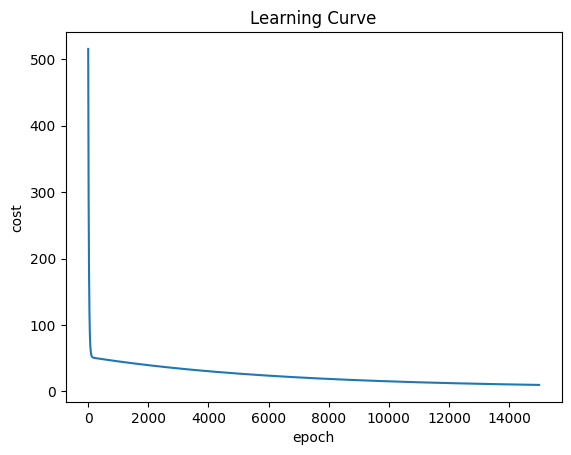

In [104]:
plt.plot(np.arange(epochs)+ 1, history_cost)
plt.title("Learning Curve")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

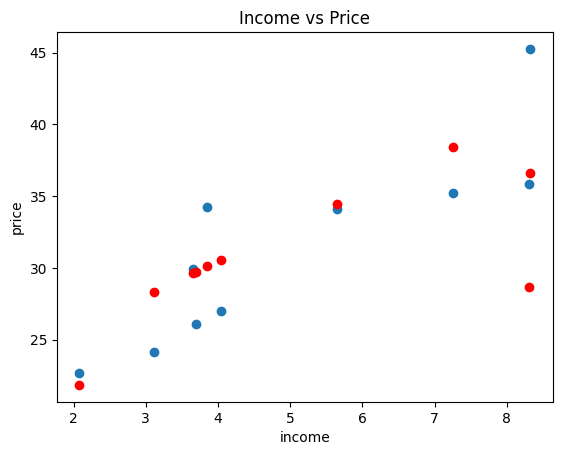

In [105]:
plt.scatter(features[-1], target)
plt.scatter(features[-1],y_hats, c = 'red')
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()